This notebook was prepared by: 

Alex Ferrante (af3913@nyu.edu)

Vinicius Moreira (vgm236@nyu.edu)

Graduate School of Arts and Science (GSAS) at New York University (NYU)

December 2021

### Principal Component Analysis (PCA)

In [1]:
#Import all packages
from bisect import bisect_left
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from ipywidgets import interact, FloatSlider


%matplotlib inline

#### 1. What is a PCA?

Principal component analysis is an unsupervised algorithm, based on feature correlation, used for dimensionality reduction. The premise is simple to take data of higher dimensions, and reduce to a lower dimension. 

Often times, in higher dimensional data, it isn't possible to create visual representations of relationships between variables. Through applying PCA, it then becomes possible to reduce the dimensions of the data and display variable relationships. This tool also allows easier visualization and noise filtering, among other applications.

In other words, it allows us to drop the "least important" variables and retain the most important parts. In addition, each new variable (the components) will be orthogonal/independent from each other, allowing them to ensure one of the main assumptions of a linear regression.

The PCA must be used when three conditions apply:

- Reduce the number of variables
- Ensure that each variable is independent of one another
- Assume that the interpretation of the independent variables is less important

#### 2. How does a PCA work?

a. Calculate a matrix that summarizes how the variables are related one another (the covariance matrix).

b. Then separate it between direction (eigenvectors) and magnitude (eigenvalues)

c. By projecting the data into a smaller space, we reduce dimension, but keep the original variables in our model

Mathematically, the first principal component is the direction in space along which projections have the largest variance. The second principal component is the direction which maximizes variance among all directions orthogonal to the first. The kth component is the variance-maximizing direction orthogonal to the previous k-1 components.

Once we have the principal components, we need do determine how many features to keep versus how many to drop. The most common methods are:

- Arbitrarily select how many dimensions to keep.
- Calculate the proportion of variance explained. One might also choose the proportion of variance explained by each component.

#### 3. Visual representation: Regression vs. PCA

A regression is a straight line that best fits the data, and a PCA is a orthogonal transformation to form the principal components (or linear combinations of the variables

The image below illustrates the difference:

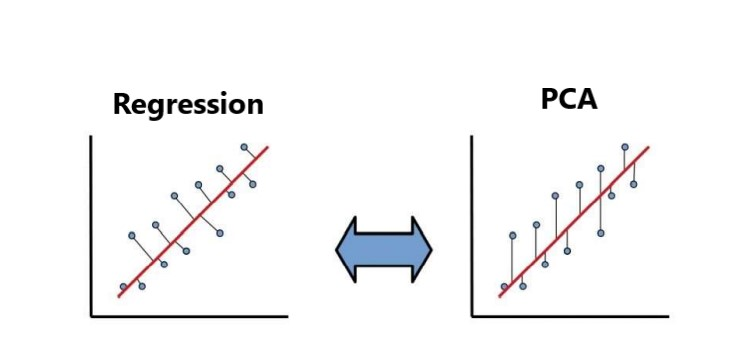

In [2]:
Image(filename="image_reg_pca.jpg", width=400, height=400)

#### 4. Theoretical example, step by step

The next section will work through the steps of how a PCA algorithm works using a toy dataset.

First, we will begin by creating a random distribution of data in a higher dimensional shape (we arbitrarily, for the sake of example, choose 10 variables).

In [3]:
#We will use this data as numpy array (from 1 to 10)
data = np.random.randint(1, 10, 1000).reshape(100, 10)

#To make it easier to visualize, let's put into a dataframe
data_frame = pd.DataFrame(data, columns = ['ID1','ID2','ID3','ID4','ID5','ID6','ID7','ID8','ID9','ID10'])
data_frame.head()

,ID1,ID2,ID3,ID4,ID5,ID6,ID7,ID8,ID9,ID10
0,3,7,9,8,4,6,5,2,1,7
1,8,5,2,4,6,4,1,4,9,3
2,3,6,4,9,2,5,2,3,1,5
3,1,2,6,5,2,5,7,4,2,9
4,6,9,4,2,2,8,8,8,5,6


The first step in PCA implementation is to find the mean of each variable and then subtract the mean from each respective row. 

For example, you find the mean of the first variable by taking the mean of all the values in the first column, then subtract the values in the first row (axis=0) by the mean of this 
first variable. 

By subtracting the means from each of the dimensions, we will then be left with a dataset that has a mean of zero and is considered "centered."

This is the normalization of our variables.

In [4]:
#This is the formula to center the data around the mean
data_centered = data - np.mean(data, axis = 0)

#Again, to make it easier to visualize, let's put into a dataframe
centered_frame = pd.DataFrame(data_centered, columns = ['ID1','ID2','ID3','ID4','ID5','ID6','ID7','ID8','ID9','ID10'])
centered_frame.head()

,ID1,ID2,ID3,ID4,ID5,ID6,ID7,ID8,ID9,ID10
0,-2.12,1.77,4.4,2.85,-0.84,0.65,0.18,-2.8,-3.81,2.14
1,2.88,-0.23,-2.6,-1.15,1.16,-1.35,-3.82,-0.8,4.19,-1.86
2,-2.12,0.77,-0.6,3.85,-2.84,-0.35,-2.82,-1.8,-3.81,0.14
3,-4.12,-3.23,1.4,-0.15,-2.84,-0.35,2.18,-0.8,-2.81,4.14
4,0.88,3.77,-0.6,-3.15,-2.84,2.65,3.18,3.2,0.19,1.14


Construct the covariance matrix.

In [5]:
#This is the formula to construct the covariance matrix
data_centered_cov = np.cov(data_centered, rowvar=False)

#Once more time, to make it easier to visualize, let's put into a dataframe
cov_frame = pd.DataFrame(data_centered_cov, columns = ['ID1','ID2','ID3','ID4','ID5','ID6','ID7','ID8','ID9','ID10'])
cov_frame.head()

,ID1,ID2,ID3,ID4,ID5,ID6,ID7,ID8,ID9,ID10
0,7.500606,-0.947071,-0.052525,-1.139394,0.221414,0.735354,-0.311515,-0.551515,0.356364,-0.275960
1,-0.947071,6.663737,0.618182,-0.853030,0.128081,0.595455,0.062020,0.147475,-0.167980,-0.078586
2,-0.052525,0.618182,7.474747,-0.898990,0.703030,0.404040,-0.052525,-1.161616,0.337374,1.256566
3,-1.139394,-0.853030,-0.898990,6.694444,-0.107071,0.462121,-0.669697,-0.131313,-0.324747,-0.807071
4,0.221414,0.128081,0.703030,-0.107071,5.933737,0.056566,-1.049293,-0.416162,0.029899,-0.557980


Find the eigenvalues and eigenvectors.

In [6]:
#This is the formula to extract the eigenvectors and eigenvalues
eigen_values1, eigen_vectors1 = np.linalg.eigh(data_centered_cov)

#See how the eigenvectors look like in a dataframe
vectors_frame = pd.DataFrame(eigen_vectors1, columns = ['ID1','ID2','ID3','ID4','ID5','ID6','ID7','ID8','ID9','ID10'])
vectors_frame.head()

,ID1,ID2,ID3,ID4,ID5,ID6,ID7,ID8,ID9,ID10
0,-0.135160,-0.438043,0.113732,-0.061648,0.164965,-0.122460,-0.143600,0.693847,0.430224,-0.209206
1,-0.280508,-0.292144,0.270818,-0.163164,0.528899,-0.089326,0.535884,-0.294218,-0.162212,-0.219636
2,0.338113,-0.305161,0.131025,0.239526,-0.417127,-0.028251,0.006615,-0.243130,0.003099,-0.695742
3,-0.302513,-0.491172,0.132190,0.088433,-0.297211,-0.396178,-0.222199,-0.367655,0.118917,0.444934
4,-0.297000,0.012247,-0.551231,0.600713,0.290915,0.076346,-0.044938,-0.203261,0.299906,-0.152284


In [7]:
#See how the eigenvalues look like in a dataframe
values_frame = pd.DataFrame(eigen_values1, index=['ID1','ID2','ID3','ID4','ID5','ID6','ID7','ID8','ID9','ID10'], columns = ['eigenvalues'])
values_frame

,eigenvalues
ID1,3.950793
ID2,4.225812
ID3,4.905856
ID4,5.844479
ID5,6.408382
ID6,7.051318
ID7,7.704529
ID8,8.270532
ID9,9.159393
ID10,9.503148


Now, take the eigenvalues and eigenvectors and sort them in descending order.

In [8]:
index = np.argsort(eigen_values1)[::-1]

sorted_values = eigen_values1[index]

sorted_vectors = eigen_vectors1[:, index]

Note that these eigenvectors are independent of one another (very low cross-correlation). Thus every principal components are perpendicular to one another (orthogonal).

In [9]:
df = pd.DataFrame(sorted_vectors)
#Pairwise correlation
df.corr(method ='pearson')

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.025073,0.019856,0.143349,-0.090198,-0.087759,0.047125,-0.094460,-0.189002,-0.162431
1,0.025073,1.000000,-0.005025,-0.036275,0.022825,0.022208,-0.011925,0.023903,0.047827,0.041103
2,0.019856,-0.005025,1.000000,-0.028727,0.018076,0.017587,-0.009444,0.018930,0.037876,0.032551
3,0.143349,-0.036275,-0.028727,1.000000,0.130494,0.126966,-0.068179,0.136660,0.273440,0.234999
4,-0.090198,0.022825,0.018076,0.130494,1.000000,-0.079890,0.042899,-0.085989,-0.172054,-0.147866
5,-0.087759,0.022208,0.017587,0.126966,-0.079890,1.000000,0.041740,-0.083664,-0.167402,-0.143868
6,0.047125,-0.011925,-0.009444,-0.068179,0.042899,0.041740,1.000000,0.044926,0.089892,0.077255
7,-0.094460,0.023903,0.018930,0.136660,-0.085989,-0.083664,0.044926,1.000000,-0.180183,-0.154853
8,-0.189002,0.047827,0.037876,0.273440,-0.172054,-0.167402,0.089892,-0.180183,1.000000,-0.309840
9,-0.162431,0.041103,0.032551,0.234999,-0.147866,-0.143868,0.077255,-0.154853,-0.309840,1.000000


Determine the amount of components you would like to return from the sorted eigenvalue matrix (we will discuss this later)

In [10]:
#We arbitrarily select 3 components, but you can change that
components = 3

#Sort the eigenvectors
eigvect_subset = sorted_vectors[:, 0:components]

#See how the subset look like in a dataframe
subset_frame = pd.DataFrame(eigvect_subset, columns=['ID1','ID2','ID3'])
subset_frame.head()

,ID1,ID2,ID3
0,-0.209206,0.430224,0.693847
1,-0.219636,-0.162212,-0.294218
2,-0.695742,0.003099,-0.243130
3,0.444934,0.118917,-0.367655
4,-0.152284,0.299906,-0.203261


Return the reduce form by matrix multiplying the transpose of the eigenvector subset and transpose of the normalized dataset. Then, transpose the product. See that the shape matches (length of data series, number of principal components)

In [11]:
data_pca = (eigvect_subset.T @ data_centered.T).T
#Check if the dimension reduction happened from 10 to 3
data_pca.shape

(100, 3)

Finally, we build a function that summarizes the steps we did above to extract the principal components.

In [12]:
#Summary function
def principal_component_analysis(data, components):
    """
    Takes a higher dimension dataset and uses PCA to reduce 
    the data to the desired numnber of dimensions
    
    Parameters
    ----------
    data : np.array(ndim=n, size=m)
        observations that were generated 
        by a model or data provided
    components : int
        number of desired components the 
        given data will be reduced to 
    
    Returns
    -------
    PCA_data : np.array(ndim=n, size=components)
        the dataset with reduced dimensions
    """
    #Centering the data
    data_centered = data - np.mean(data, axis=0)
    
    #Get covariance matrix
    data_centered_cov = np.cov(data_centered, rowvar=False)
    
    #Get eigenvalues and eigenvectors
    eigen_values, eigen_vectors = np.linalg.eigh(data_centered_cov)

    index = np.argsort(eigen_values)[::-1]
    sorted_values = eigen_values[index]
    sorted_vectors = eigen_vectors[:, index]

    vector_subset = sorted_vectors[:, 0:components]

    PCA_data = (vector_subset.T @ data_centered.T).T #similar to .transform in the PCA package

    return PCA_data

#### 5. Testing our new function, on a new theoretical example

At this step, we test whether our function is indeed reducing the dimensions. The transformed data should have 5 principal components from a dataset that had 8 columns and 10 values for each of those columns.

In [13]:
# Test: Creating the new data set 
data1 = np.random.randint(1, 10, 80).reshape(10, 8)

#As we did above, see how the new data set look like in a dataframe
data1_frame = pd.DataFrame(data1, columns=['Data1','Data2','Data3','Data4','Data5','Data6','Data7','Data8'])
data1_frame

,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8
0,8,2,7,6,3,3,6,3
1,6,4,1,6,3,4,2,7
2,9,7,2,8,5,8,8,8
3,7,5,6,5,2,1,4,9
4,9,1,7,2,9,5,6,4
5,4,1,2,9,7,5,5,4
6,5,6,7,8,4,8,9,9
7,7,2,6,6,9,4,2,5
8,4,9,8,5,6,6,1,3
9,5,1,7,6,3,4,8,2


Once we have the data, we parse our summary function to our new data set.

In [14]:
ex1 = principal_component_analysis(data1, 5)

ex1_frame = pd.DataFrame(ex1, columns=['ID1','ID2','ID3','ID4','ID5'])
ex1_frame

,ID1,ID2,ID3,ID4,ID5
0,-2.436565,-1.891446,-0.869912,2.900210,-0.405272
1,1.880919,2.454120,4.613550,1.476728,0.018448
2,6.241249,-1.708267,0.359967,-2.541647,1.835352
3,1.689907,2.108686,0.368896,5.203857,2.204120
4,-5.006780,-1.764657,-1.517883,-2.014487,4.017971
5,-0.895337,-1.716772,4.181516,-2.528599,-3.104213
6,5.507995,-2.095873,-3.419219,-0.800517,-0.612101
7,-3.640885,1.728238,1.429288,-2.240136,1.401433
8,-0.682683,6.585886,-3.627069,-1.666457,-2.341471
9,-2.657821,-3.699915,-1.519133,2.211049,-3.014267


We now build a function that will return the minimum necessary amount of components needed to explain 95% variance in a given model. 

In this case, 95% variance (convention) is an arbitrary selection and the parameter in the function can be altered to any desired level of variance.

In [15]:
def number_components(data_set, desired_var):
    """
    Uses the cumulative sum array of explained variance 
    to interpret how many components are required to meet
    a desired level of modeling variance 
    
    Parameters
    ----------
    data : np.array(ndim=n, size=m)
        observations that were generated 
        by a model or data provided
        
    desired_var : int
        the desired variance level which you would 
        like to have your model explain  
    
    Returns
    -------
    pos : int
        Number of principal components necessary to achieve desired_var
    """
    
    #Centering the data
    data_centered = data_set - np.mean(data_set, axis=0)
    
    #Get covariance matrix
    data_centered_cov = np.cov(data_centered, rowvar=False)    
    
    #Get the eigenvalues and eigenvectors
    eigen_values, eigen_vectors = np.linalg.eigh(data_centered_cov)
    
    #Sum the eigenvalues
    total_values = sum(eigen_values)
    
    #Then use them to see how much they will explain of the variance
    explained_var = [(i/total_values) for i in sorted(eigen_values, reverse=True)]
    
    #This function sees how they cumulatively explain the variance
    sum_explained = np.cumsum(explained_var)
    
    #Find the number of principal components to achieve the desired_var
    pos = bisect_left(sum_explained, desired_var)
    
    return pos+1

print(f"Number of components necessary to explain aproximately 95% of the variance is: {number_components(data1, .95)}")

Number of components necessary to explain aproximately 95% of the variance is: 6


Now, let's show graphically how each principal component contributes to explaining the variance.

Note that the function below is a replica of the above, but ending on the "sum_explained" step.

In [16]:
def explained_variance(data_set):
    """
    Find the cumulative sum array of explained variance 
    
    Parameters
    ----------
    data : np.array(ndim=n, size=m)
        observations that were generated 
        by a model or data provided
    
    Returns
    -------
    sum_explained : np.array
        Percentage of the variance explained (how each component cumulatively explain the variance)
    """
    
    #Centering the data
    data_centered = data_set - np.mean(data_set, axis=0)
    
    #Get covariance matrix
    data_centered_cov = np.cov(data_centered, rowvar=False)    
    
    #Get the eigenvalues and eigenvectors
    eigen_values, eigen_vectors = np.linalg.eigh(data_centered_cov)
    
    #Sum the eigenvalues
    total_values = sum(eigen_values)
    
    #Then use them to see how much they will explain of the variance
    explained_var = [(i/total_values) for i in sorted(eigen_values, reverse=True)]
    
    #This function sees how they cumulatively explain the variance
    sum_explained = np.cumsum(explained_var)
    
    return sum_explained

sum_explained2 = explained_variance(data1)

#See how the explained variance look like in a dataframe
index_components=['ID1','ID2','ID3','ID4','ID5','ID6','ID7','ID8']
explained_frame = pd.DataFrame(sum_explained2, index_components, columns = ['explained_variance'])
explained_frame

,explained_variance
ID1,0.295026
ID2,0.496197
ID3,0.660166
ID4,0.816350
ID5,0.933825
ID6,0.978307
ID7,0.995738
ID8,1.000000


Visually, the logic is the following:

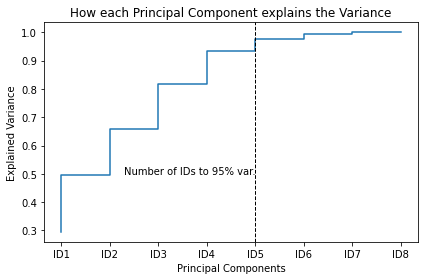

In [17]:
#Cumulative explanation of the variance for the addition of each principal component
plt.step(index_components, explained_frame,
where='pre', label="Explained Variance")

#Name labels and titles
plt.ylabel("Explained Variance")
plt.xlabel("Principal Components")
plt.title("How each Principal Component explains the Variance")

#Add vertical line to show where the principal component analysis is close to reach 95% of the explained variance
id_annotation = 'ID6'
plt.axvline(x=id_annotation, linestyle='dashed', color='black', linewidth=1)
plt.annotate("Number of IDs to 95% var.", xy=[id_annotation, .5], horizontalalignment='right')

#Show chart
plt.tight_layout()
plt.show()

We can see that, at the margin, each step explains less of the variance. 

For example, the addition of the first component explains about 15% of the variance. The addition of the last component adds only about 5%-points of explanation of the variance.

Note that the function below is a replica of the others, but ending on the "explained_var" step. In this case, we don't use a step chart as a line makes easier to see the marginal change.

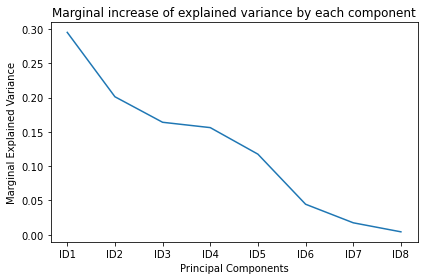

In [18]:
def marginal_variance(data_set):
    """
    Find the cumulative sum array of explained variance 
    
    Parameters
    ----------
    data : np.array(ndim=n, size=m)
        observations that were generated 
        by a model or data provided
    
    Returns
    -------
    explained_var : list
        Percentage of the variance explained at the margin (how each component explain the variance)
    """
    
    #Centering the data
    data_centered = data_set - np.mean(data_set, axis=0)
    
    #Get covariance matrix
    data_centered_cov = np.cov(data_centered, rowvar=False)    
    
    #Get the eigenvalues and eigenvectors
    eigen_values, eigen_vectors = np.linalg.eigh(data_centered_cov)
    
    #Sum the eigenvalues
    total_values = sum(eigen_values)
    
    #Then use them to see how much they will explain of the variance
    explained_var = [(i/total_values) for i in sorted(eigen_values, reverse=True)]
    
    return explained_var

#Marginal explanation of variance
explained_var2 = marginal_variance(data1)

#Charting how the marginal explanation evolves by each principal component
plt.plot(index_components, explained_var2, label="Marginal Explained Variance")

#Name labels and titles
plt.ylabel("Marginal Explained Variance")
plt.xlabel("Principal Components")
plt.title("Marginal increase of explained variance by each component")

#Show chart
plt.tight_layout()
plt.show()

#### 6. Application: Image recognition

Let's test the ability of our function, given a set of principal components, of replicating the QuantEcon logo.

First, we will download the packages and get the image from the web.

(163, 310, 4)


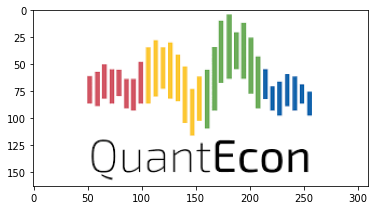

In [19]:
img = mpimg.imread('quantecon')
print(img.shape)
plt.imshow(img)

Our image is in the form of 163 rows each containing 310 pixels which have 4 channels (RGB). We have to resize the image so that it is in the format required for PCA input. As 310*4=1240, we resize the image to (163, 1240).

Let's use a package to see how it fits the original image of the QuantEcon logo, to see if our function works as well as the package's.

In [20]:
#Define the image to be used
image = img

#Create a function to add to the interaction tool
def image_recognition(Factors):
    """
    Reconstruct an image using a PCA
    Use the PCA package from sklearn as a function to fit into a slider
    
    Parameters
    ----------
    Factors : int
        Number of principal components you want to use
    
    Returns
    -------
    plot : module
        Plot reconstructing the image
    """    
    
    #Reshape image
    img_r = np.reshape(image, (163, 310*4)) 
    
    #Define the model using the PCA package and the number of Principal Components ("Factors")
    pca = PCA(int(Factors)).fit(img_r) 
    
    #Apply eigenvectors to dataset
    img_transformed = pca.transform(img_r) 
    
    #Reconstruct the image
    temp = pca.inverse_transform(img_transformed)
    
    #Reshape it back
    temp = np.reshape(temp, (163, 310 , 4)) 
    
    #Build the plot
    plt.imshow(temp)

#Use slider to interact and see how many components you need to reconstruct it 
interact(image_recognition, Factors=FloatSlider(value=6, min=1, max=32, step=1))

interactive(children=(FloatSlider(value=6.0, description='Factors', max=32.0, min=1.0, step=1.0), Output()), _…

<function __main__.image_recognition(Factors)>

Let's use our algorithm (function of principal component analysis) to see how it fits the original image of the QuantEcon logo.

In [22]:
#Define the image to be used
image = img

def image_recognition_va(Factors):
    """
    Reconstruct an image using our own algorithm
    Use it as a function to fit into a slider
    
    Parameters
    ----------
    Factors : int
        Number of principal components you want to use
    
    Returns
    -------
    plot : module
        Plot reconstructing the image
    """   

    #Reshape image (as above)
    img_r_va = np.reshape(img, (163, 310*4)) 

    #This step covers three parts (similar to transform in the sklearn package): 
    #Define the model using the PCA package and the number of Principal Components ("Factors")   
    #Apply eigenvectors to dataset
    pca_transform_va = principal_component_analysis(img_r_va, int(Factors))

    #These additional steps are needed to transform the principal components back into the image 
    #Reconstruct the image using the inverse_transform package (just matrix multiplications)
    temp_va = pca_transform_va.inverse_transform(img_r_va)

    #Reshape it back
    temp_va = np.reshape(temp_va, (163, 310 , 4)) 
    
    #Build the plot
    plt.imshow(temp_va)

interact(
    image_recognition_va, 
    Factors=FloatSlider(value=6, min=1, max=32, step=1),
)

interactive(children=(FloatSlider(value=6.0, description='Factors', max=32.0, min=1.0, step=1.0), Output()), _…

<function __main__.image_recognition_va(Factors)>

In [41]:
#Find out how to inverse transform

img_r_va = np.reshape(img, (163, 310*4)) 

pca_transform_va = principal_component_analysis(img_r_va, 6)

#temp_va = pca_transform_va.inverse_transform(img_r_va)

temp_va=np.dot(pca_transform_va,np.sqrt(self.explained_variance_[:, np.newaxis]) * pca_transform_va.T,) + np.mean(pca_transform_va)

temp_va = np.reshape(temp_va, (163, 310 , 4)) 

plt.imshow(temp_va)



NameError: name 'self' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


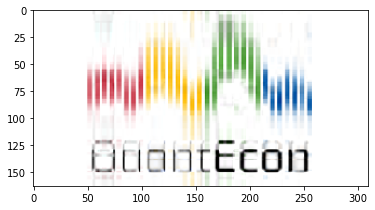

In [40]:

img_r = np.reshape(image, (163, 310*4)) 
    
pca = PCA(6).fit(img_r) 
    
img_transformed = pca.transform(img_r) 

temp = pca.inverse_transform(img_transformed)
    
temp = np.reshape(temp, (163, 310 , 4)) 
    
plt.imshow(temp)

Ask Chase to see if can help to debug last part. Problem: cannot adapt the inverse transformation part.

https://github.com/scikit-learn/scikit-learn/blob/0d378913be6d7e485b792ea36e9268be31ed52d0/sklearn/decomposition/_base.py#L156

#### 7. References

1. Towards Science: A One-Stop Shop for Principal Component Analysis (https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c).

2. In Depth: Principal Component Analysis (https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html).

3. Advanced Data Analysis from an Elementary Point of View (https://www.stat.cmu.edu/~cshalizi/uADA/15/lectures/17.pdf).

4. Applications of Principal Component Analysis (PCA) (https://iq.opengenus.org/applications-of-pca/).

5. SciKit Learn package (https://github.com/scikit-learn/scikit-learn/blob/0d378913be6d7e485b792ea36e9268be31ed52d0/sklearn/decomposition/_base.py#L156)